In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# 1. Read the dataset to the python environment.

In [2]:
#storing the dataset to a dataframe named 'data'
data=pd.read_csv('Wholesale customers data.csv')

In [3]:
#displaying the first few rows
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
data.shape

(440, 8)

There are 440 observations and 8 features in the dataset.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
#descriptive statistics
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


## Preprocessing

### Handling null values

In [7]:
data.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

### Feature scaling

In [8]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
label_sc =sc.fit_transform(data)
label_sc=pd.DataFrame(label_sc)

In [9]:
label_sc.head()

,0,1,2,3,4,5,6,7
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


# 2. Try out different clustering models in the Whole sale customer dataset.

# 3. Find the optimum number of clusters in each model and create the model with the optimum number of clusters.


## KMeans Clustering

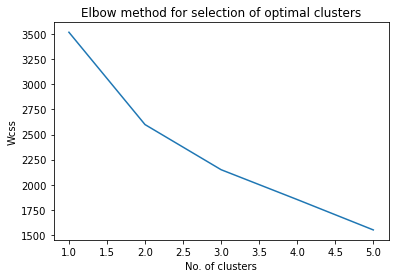

In [10]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,6):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(label_sc)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,6),wcss)
plt.title('Elbow method for selection of optimal clusters')
plt.xlabel('No. of clusters')
plt.ylabel('Wcss')
plt.show()

In [11]:
#kmeans with 2 clusters
kmeans=KMeans(n_clusters=2,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(label_sc)

In [12]:
from sklearn.metrics import silhouette_score
silhouette_avg=silhouette_score(label_sc,y_kmeans)
print('Silhouette score for Kmeans method:- ',round(silhouette_avg,5))

Silhouette score for Kmeans method:-  0.37324


##  Agglomerative hierarchical clustering

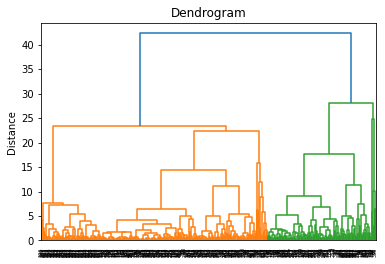

In [13]:
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(label_sc,method='ward'),distance_sort='ascending',show_leaf_counts=True)
plt.title('Dendrogram')
plt.ylabel('Distance')
plt.show()

In [14]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(label_sc)

In [15]:
silhouette_avg=silhouette_score(label_sc,y_hc)
print('Silhouette score for Kmeans method:- ',round(silhouette_avg,5))

Silhouette score for Kmeans method:-  0.36802


# 4. Perform PCA for Dimensionality reduction.


In [16]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(label_sc)
x_pca=pca.transform(label_sc)

In [17]:
x_pca.shape

(440, 2)

The number of features have reduced.

In [18]:
pca.explained_variance_ratio_

array([0.38750123, 0.22374588])

Thers is over 60% variance.

## KMeans Clustering after PCA

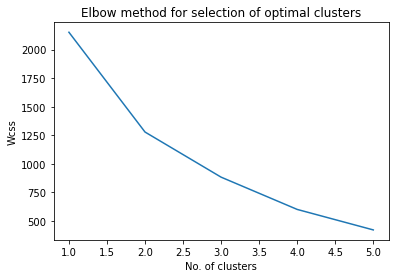

In [19]:
wcss=[]
for i in range(1,6):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,6),wcss)
plt.title('Elbow method for selection of optimal clusters')
plt.xlabel('No. of clusters')
plt.ylabel('Wcss')
plt.show()

In [20]:
#kmeans with 2 clusters
kmeans=KMeans(n_clusters=2,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(x_pca)

In [21]:
silhouette_avg=silhouette_score(x_pca,y_kmeans)
print('Silhouette score for Kmeans method:- ',round(silhouette_avg,5))

Silhouette score for Kmeans method:-  0.54749


## Agglomerative hierarchical clustering after PCA

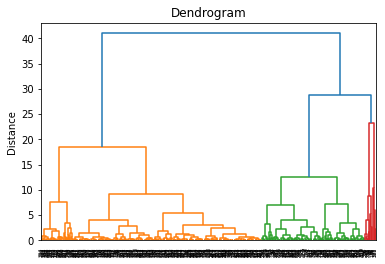

In [22]:
dendrogram=sch.dendrogram(sch.linkage(x_pca,method='ward'),distance_sort='ascending',show_leaf_counts=True)
plt.title('Dendrogram')
plt.ylabel('Distance')
plt.show()

In [23]:
hc=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(x_pca)

In [24]:
silhouette_avg=silhouette_score(x_pca,y_hc)
print('Silhouette score for Kmeans method:- ',round(silhouette_avg,5))

Silhouette score for Kmeans method:-  0.52772


The Silhouette score has improved after principal component analysis.